# Linear Regression

## 1. Libraries

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

## 2. Data Load & Overview

Let's load the dataset and understand it.

In [54]:
df = pd.read_csv('https://raw.githubusercontent.com/5x12/ml-cookbook/master/supplements/data/cars.csv')

In [55]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


This Cars Dataset represents cars characteristics, along with their prices.

- `car_ID`: Unique id of each observation (Interger)
- `symboling`: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 		
- `carCompany`: Name of car company (Categorical)		
- `fueltype`: Car fuel type i.e gas or diesel (Categorical)		
- `aspiration`: Aspiration used in a car (Categorical)		
- `doornumber`: Number of doors in a car (Categorical)		
- `carbody`: body of car (Categorical)		
- `drivewheel`: type of drive wheel (Categorical)		
- `enginelocation`: Location of car engine (Categorical)		
- `wheelbase`: Weelbase of car (Numeric)		
- `carlength`: Length of car (Numeric)		
- `carwidth`: Width of car (Numeric)		
- `carheight` Height of car (Numeric)		
- `curbweight` The weight of a car without occupants or baggage. (Numeric)		
- `enginetype`: Type of engine. (Categorical)		
- `cylindernumber`: Cylinder placed in the car (Categorical)		
- `enginesize`: Size of car (Numeric)		
- `fuelsystem`: Fuel system of car (Categorical)		
- `boreratio`: Boreratio of car (Numeric)		
- `stroke`: Stroke or volume inside the engine (Numeric)		
- `compressionratio`: Compression ratio of car (Numeric)		
- `horsepower`: Horsepower (Numeric)		
- `peakrpm`: Car peak rpm (Numeric)		
- `citympg`: Mileage in city (Numeric)		
- `highwaympg`: Mileage on highway (Numeric)		
- `price` (Dependent variable): Price of car in \$ (Numeric)

The main aim is to build **a model that predicts a price of a car** (`price` column) based on independent variables.

## 3. Variables

In [56]:
X = df[['symboling', 'enginesize', 'horsepower']]

X

,symboling,enginesize,horsepower
0,3,130,111
1,3,130,111
2,1,152,154
3,2,109,102
4,2,136,115
...,...,...,...
200,-1,141,114
201,-1,141,160
202,-1,173,134
203,-1,145,106


In [35]:
y = df['price']

y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## 4. Model

### 4.1. Building the model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 2
                                                   )

In [37]:
reg = LinearRegression()

In [38]:
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
reg = Ridge(alpha=4.0, max_iter = 10000)

In [44]:
reg.fit(X_train, y_train)

Ridge(alpha=4.0, max_iter=10000)

### 4.2. Checking models accuracy

After the model has trained with the data, it's essential to understand how precisely it predicts car prices. For that, we need to check model's accuracy. 

In [45]:
print(f'Accuracy (R-squared score) of Linear Regression model on training set: {reg.score(X_train, y_train):.2f}')
print(f'Accuracy (R-squared score) of Linear Regression model on test set: {reg.score(X_test, y_test):.2f}')

Accuracy (R-squared score) of Linear Regression model on training set: 0.80
Accuracy (R-squared score) of Linear Regression model on test set: 0.77


In [46]:
print(f'Accuracy (R-squared score) of Ridge Regression model on training set: {reg.score(X_train, y_train):.2f}')
print(f'Accuracy (R-squared score) of Ridge Regression model on test set: {reg.score(X_test, y_test):.2f}')

Accuracy (R-squared score) of Ridge Regression model on training set: 0.80
Accuracy (R-squared score) of Ridge Regression model on test set: 0.77


### 4.3. Making a prediction

Now that we know the model is accurate enough, we can predict the price of any car by passing independent varialbes `symboling`, `enginesize`, `horsepower` to the model. 


The method `predict` returns such a prediction.

In [47]:
reg.predict([[0, 112, 220]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([19179.30796184])

In [48]:
reg.predict([[0, 112, 220]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([19179.30796184])

In [49]:
for this_alpha in [0, 1, 5, 30, 70, 100]:
    
    reg = Ridge(alpha=this_alpha, max_iter = 10000)
    
    reg.fit(X_train, y_train)
    
    r2_train = reg.score(X_train, y_train)
    r2_test = reg.score(X_test, y_test)
    
    print(f'''Alpha = {this_alpha:.2f}
              r-squared training: {r2_train:.2f},
              r-squared test: {r2_test:.2f} \n''')

Alpha = 0.00
              r-squared training: 0.80,
              r-squared test: 0.77 

Alpha = 1.00
              r-squared training: 0.80,
              r-squared test: 0.77 

Alpha = 5.00
              r-squared training: 0.80,
              r-squared test: 0.77 

Alpha = 30.00
              r-squared training: 0.80,
              r-squared test: 0.77 

Alpha = 70.00
              r-squared training: 0.80,
              r-squared test: 0.77 

Alpha = 100.00
              r-squared training: 0.80,
              r-squared test: 0.77 



In [50]:
reg = Ridge(alpha=1.0,
            fit_intercept=True, 
            copy_X=True, 
            max_iter=None, 
            tol=0.0001, 
            solver='auto', 
            positive=False, 
            random_state=None)

In [51]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = Ridge(alpha=30.0)

reg.fit(X_train_scaled, y_train)

print(f'Ridge regression linear model intercept: {(reg.intercept_)}')
print(f'Ridge regression linear model coeff: {(reg.coef_)}\n')
print(f'R-squared score (training): {reg.score(X_train_scaled, y_train):.3f}')
print(f'R-squared score (test): {reg.score(X_test_scaled, y_test):.3f}\n')

Ridge regression linear model intercept: 13349.47385620915
Ridge regression linear model coeff: [-314.01624585 4048.98701561 2898.86758992]

R-squared score (training): 0.790
R-squared score (test): 0.767



### 4.4. Understanding trained model

In [52]:
print(f'linear model coeff (w): {reg.coef_}')
print(f'linear model intercept (b): {reg.intercept_:.3f}')

linear model coeff (w): [-314.01624585 4048.98701561 2898.86758992]
linear model intercept (b): 13349.474


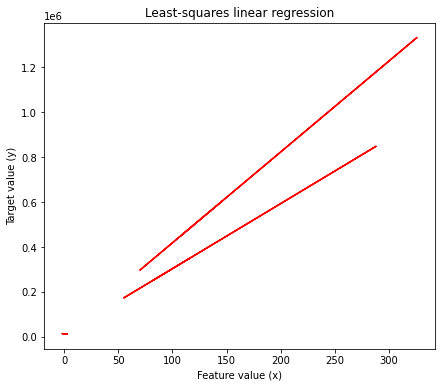

In [53]:
plt.figure(figsize=(7,6))
# plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X_train, reg.coef_ * X_train + reg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()
